In [1]:
import sys
import cv2
import copy 
sys.path.insert(1, '../../src/')
import matplotlib.pyplot as plt
from models.rtmpose.model import RTMPoseModel
from utils.vision import DrawerPose
draw_skeleton = DrawerPose()

# Read image

(3024, 4032, 3)


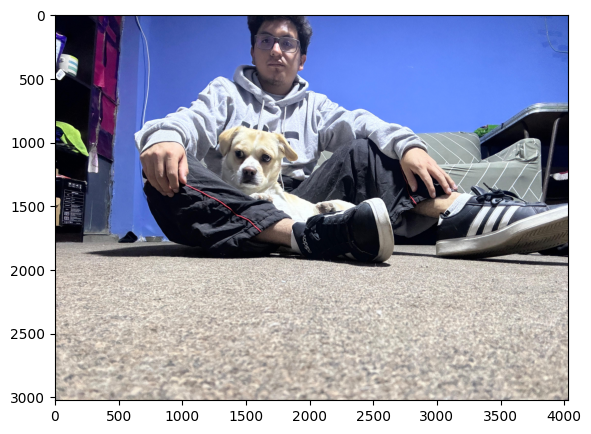

In [2]:
img     = cv2.imread("../../data/images/image_1.jpeg")
print(img.shape)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


fig=plt.figure(figsize=(10,5))
plt.imshow(img_rgb)
plt.show()

# Load model

In [3]:
kpt_thr = 2.5
model = RTMPoseModel(mode='performance',backend='onnxruntime',
                     use_thresholding=False,filter_noise=False,kpt_thr=kpt_thr)

onnx_model: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/onnx_sdk/yolox_m_8xb8-300e_humanart-c2c7a14a.zip
onnx_model: /home/cristian/.cache/rtmlib/hub/checkpoints/yolox_m_8xb8-300e_humanart-c2c7a14a.onnx


2024-05-12 01:44:14.291537928 [W:onnxruntime:, session_state.cc:1166 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2024-05-12 01:44:14.291556670 [W:onnxruntime:, session_state.cc:1168 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.
2024-05-12 01:44:14.834571804 [W:onnxruntime:, graph.cc:3593 CleanUnusedInitializersAndNodeArgs] Removing initializer '1701'. It is not used by any node and should be removed from the model.


load /home/cristian/.cache/rtmlib/hub/checkpoints/yolox_m_8xb8-300e_humanart-c2c7a14a.onnx with onnxruntime backend
onnx_model: https://download.openmmlab.com/mmpose/v1/projects/rtmw/onnx_sdk/rtmw-dw-x-l_simcc-cocktail14_270e-384x288_20231122.zip
onnx_model: /home/cristian/.cache/rtmlib/hub/checkpoints/rtmw-dw-x-l_simcc-cocktail14_270e-384x288_20231122.onnx
load /home/cristian/.cache/rtmlib/hub/checkpoints/rtmw-dw-x-l_simcc-cocktail14_270e-384x288_20231122.onnx with onnxruntime backend


2024-05-12 01:44:14.834597659 [W:onnxruntime:, graph.cc:3593 CleanUnusedInitializersAndNodeArgs] Removing initializer '1706'. It is not used by any node and should be removed from the model.
2024-05-12 01:44:14.834658367 [W:onnxruntime:, graph.cc:3593 CleanUnusedInitializersAndNodeArgs] Removing initializer '1709'. It is not used by any node and should be removed from the model.
2024-05-12 01:44:14.956010715 [W:onnxruntime:, session_state.cc:1166 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2024-05-12 01:44:14.956031582 [W:onnxruntime:, session_state.cc:1168 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


In [4]:
keypoints, scores = model.predict(frame_rgb=img_rgb)

In [5]:
scores[0,:10]

array([7.5873284, 8.04126  , 7.9865246, 7.207576 , 6.16709  , 4.9160786,
       5.1606226, 4.770605 , 4.5560207, 6.1247787], dtype=float32)

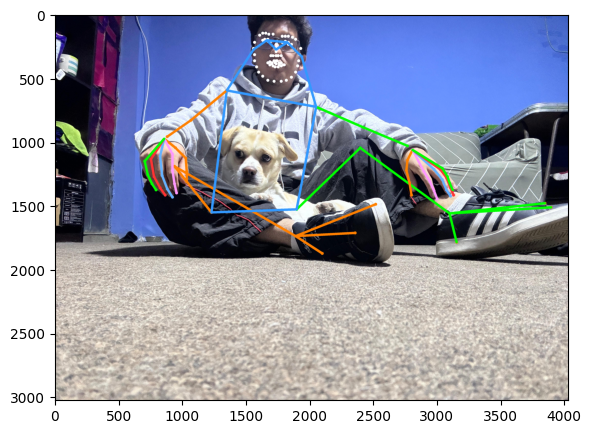

In [6]:
img_rgb_new2 = copy.deepcopy(img_rgb)
img_rgb_new2 = draw_skeleton(img_rgb_new2, keypoints, scores, kpt_thr=0.5,
                             line_width=18,radius=12)

fig=plt.figure(figsize=(10,5))
plt.imshow(img_rgb_new2)
plt.show()


In [7]:
keypoints.shape,scores.shape

((1, 133, 2), (1, 133))

In [8]:
type(keypoints),type(scores)

(numpy.ndarray, numpy.ndarray)

In [9]:
keypoints[0][:5],scores[0][:5]

(array([[1734.19840495,  270.92564774],
        [1822.74705844,  214.57650312],
        [1661.74950663,  198.47674751],
        [1935.44534471,  327.27479235],
        [1557.10109795,  270.92564774]]),
 array([7.5873284, 8.04126  , 7.9865246, 7.207576 , 6.16709  ],
       dtype=float32))